# Integration with MC, QMC and RQMC and other illustrative examples

Toy example: $f(x)=\int _{-1}^{1}x^2\,\mathbb{U}(x)$ where $\mathbb{U}=U[0,1]$

Equal-weight quadrature: $f(x)\approx\frac{1}{n}\sum_{i=1}^{n}I_i=\frac{b-a}{n}\sum_{i=1}^{n}g(a+(b-a)u_i)=\frac{2}{n}\sum_{i=1}^{n}(-1+2u_i)^2$


### import libraries

In [25]:
! pip install particles

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import particles.qmc as qmc

Set size for plot labels:

In [27]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

parameters:


In [28]:
np.random.seed(1234)

In [29]:
n =2**9
a = -1
b = 1
r = 10

uniform inverse cdf:


In [30]:
def qunif(a,b,u):
  return (a+(b-a)*u)

def func(x):
  return (x**2)

MC:

In [31]:
unif = np.random.rand(n)
approx_mc = ((b-a)/n)*np.sum(func(qunif(a,b,unif)))
print(approx_mc)

0.6927272538062639


QMC (Sobol sequence):

In [32]:
unif = qmc.sobol(n,1,0)
approx_qmc = ((b-a)/n)*np.sum(func(qunif(a,b,unif)))
print(approx_qmc)

0.6666261106729507


RQMC (scrambled Sobol sequence):

In [33]:
approx_rqmc_r = []
for i in range(r):
  unif = qmc.sobol(n,1,1)
  approx_rqmc_r.append(((b-a)/n)*np.sum(func(qunif(a,b,unif))))
approx_rqmc = np.mean(approx_rqmc_r)
print(approx_rqmc)

0.6666572504796207


### Integral approximation against number of samples

In [34]:
approx_mc = []
approx_qmc = []
approx_rqmc = []

unif_qmc = qmc.sobol(n,1,0)

for i in range(n):

  # MC
  ave_mc = []
  for j in range(r):
    unif = np.random.rand(i+1)
    ave_mc.append(((b-a)/(i+1))*np.sum(func(qunif(a,b,unif))))
  approx_mc.append(np.mean(ave_mc))

  # QMC
  approx_qmc.append(((b-a)/(i+1))*np.sum(func(qunif(a,b,unif_qmc[:(i+1)]))))

  # RQMC
  ave_rqmc = []
  for j in range(r):
    unif = qmc.sobol(i+1,1,1)
    ave_rqmc.append(((b-a)/(i+1))*np.sum(func(qunif(a,b,unif))))
  approx_rqmc.append(np.mean(ave_rqmc))


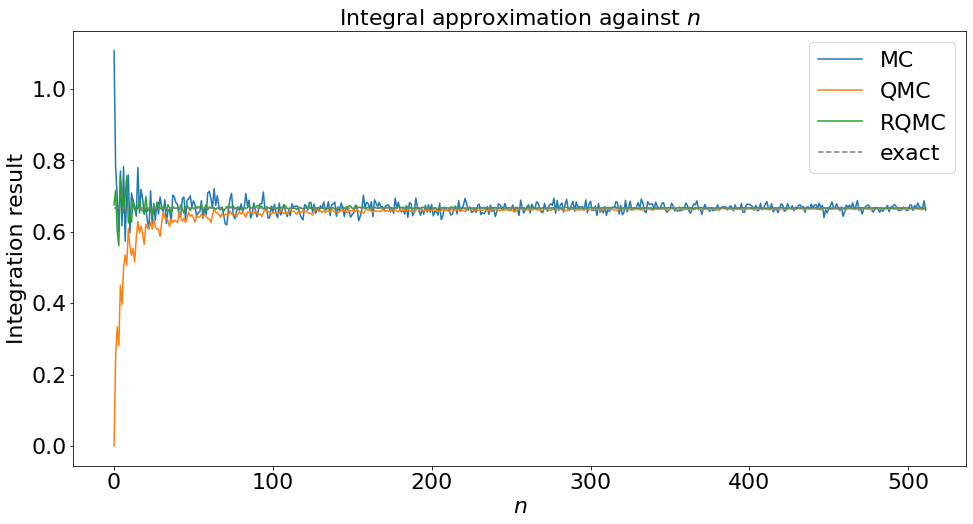

In [35]:
# plot approximation against n
plt.figure(figsize=(16,8))
plt.plot(approx_mc, label='MC')
plt.plot(approx_qmc, label='QMC')
plt.plot(approx_rqmc, label='RQMC')
plt.plot(np.ones(n)*(2/3), color='grey', linestyle='dashed',label = 'exact')
plt.xlabel(r'$n$')
plt.ylabel('Integration result')
plt.title('Integral approximation against '+r'$n$')
plt.legend()
plt.savefig('approx_against_n.pdf')
plt.show() 

Integration error

In [36]:
err_mc = np.array(approx_mc)-(2/3)
err_qmc = np.array(approx_qmc)-(2/3)
err_rqmc = np.array(approx_rqmc)-(2/3)

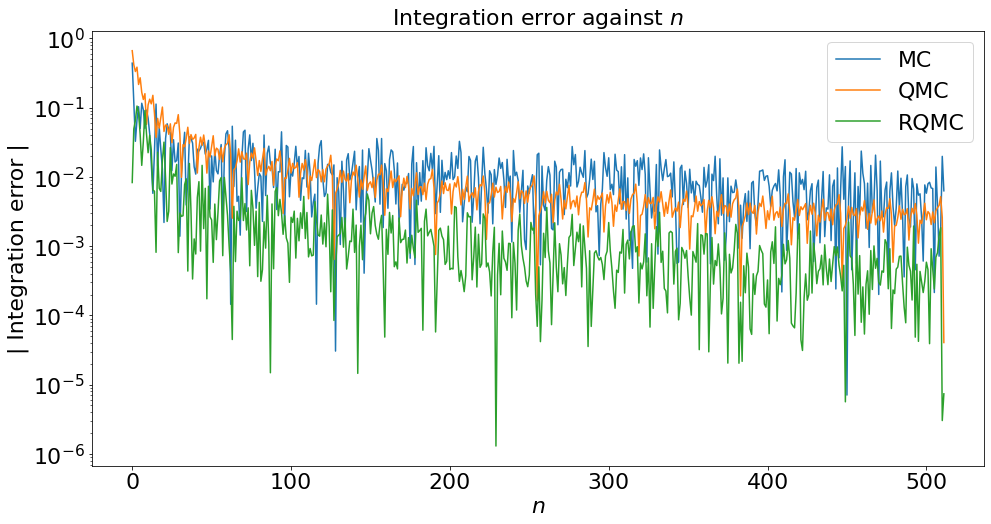

In [37]:
# plot error against n
plt.figure(figsize=(16,8))
plt.plot(np.abs(err_mc), label='MC')
plt.plot(np.abs(err_qmc), label='QMC')
plt.plot(np.abs(err_rqmc), label='RQMC')
#plt.xscale('log', basex=2)
plt.yscale('log', basey=10)
plt.xlabel(r'$n$')
plt.ylabel('| Integration error |')
plt.title('Integration error against '+r'$n$')
plt.legend()
plt.savefig('error_against_n.pdf')
plt.show() 

## Visualisation of MC, QMC and RQMC point sets

Function to plot points on $[0,1]^2$:

In [38]:
def plot_2d_unif(x, y, x_name, y_name, save_name, size):

  fig = plt.figure(figsize=size)

  points = [x, y]
  titles = [x_name, y_name]

  for i in range(2):
    ax = fig.add_subplot(1,2,(i+1))
    ax.plot(points[i][:,0],points[i][:,1], 'o')
    ax.set_title(titles[i])
    ax.set_ylabel(r'$u_2$')
    ax.set_xlabel(r'$u_1$')

  plt.tight_layout()
  plt.savefig(save_name)
  plt.show()

Number of points:

In [39]:
n = 2**10

Plot MC and QMC points:

In [40]:
mc = np.random.rand(n,2)
hal = qmc.halton(n,2)
sob = qmc.sobol(n,2,0)

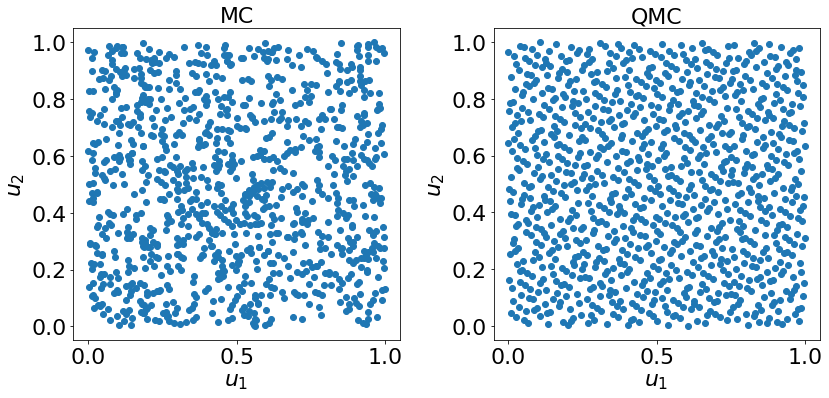

In [41]:
plot_2d_unif(mc, hal, 'MC', 'QMC', 'unif_mc_qmc.pdf', (12,6))

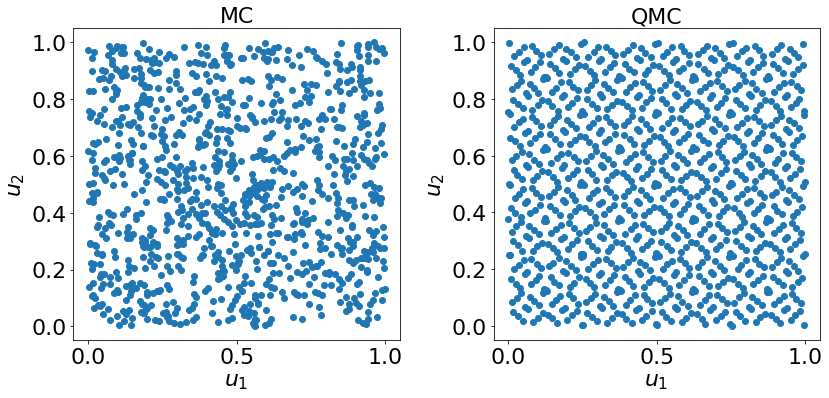

In [42]:
plot_2d_unif(mc, sob, 'MC', 'QMC', 'unif_mc_qmc_2.pdf', (12,6))

Plot QMC and RQMC points:

In [43]:
scr_sob = qmc.sobol(n,2,1)

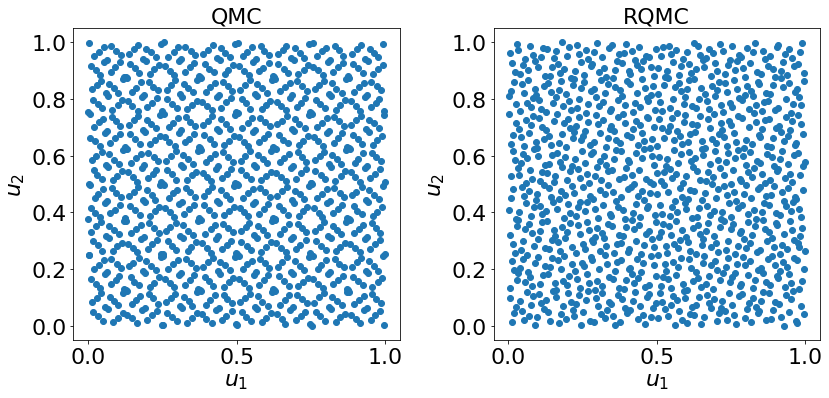

In [44]:
plot_2d_unif(sob, scr_sob, 'QMC', 'RQMC', 'unif_qmc_rqmc.pdf', (12,6))

## Inverse vs. Box-Muller transform

Box-Muller transform:

In [45]:
def boxmuller(unif1,unif2):
  u1 = np.sqrt(-2*np.log(unif1))*np.cos(2*np.pi*unif2)
  u2 = np.sqrt(-2*np.log(unif1))*np.sin(2*np.pi*unif2)
  return np.transpose(np.vstack([u1,u2]))

Generate normals:

In [46]:
sob_bm = boxmuller(sob[:,0],sob[:,1])
sob_inv = stats.norm.ppf(sob, loc=0, scale=1)

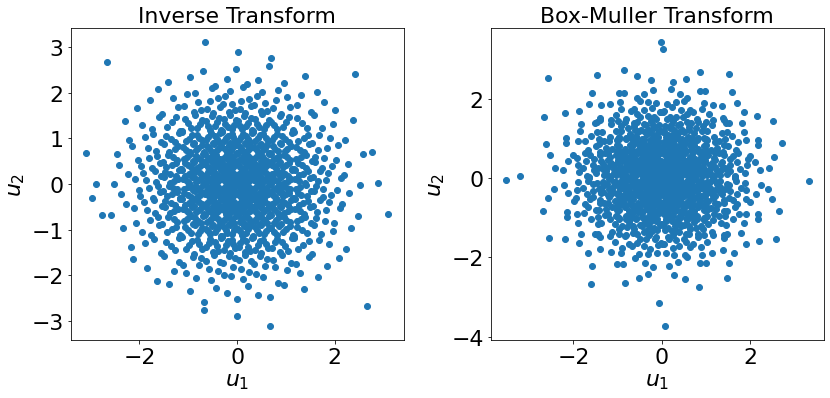

In [47]:
#plot_2d_unif(mc_inv, sob_inv, 'MC - Inverse Transform', 'QMC - Inverse Transform', 'norm_qmc_rqmc.pdf', (12,6))
#plot_2d_unif(mc_bm, sob_bm, 'MC - Box-Muller Transform', 'QMC - Box-Muller Transform', 'norm_qmc_rqmc.pdf', (12,6))
plot_2d_unif(sob_inv, sob_bm, 'Inverse Transform', 'Box-Muller Transform', 'norm_inv_bm.pdf', (12,6))

## Distances between mean embeddings

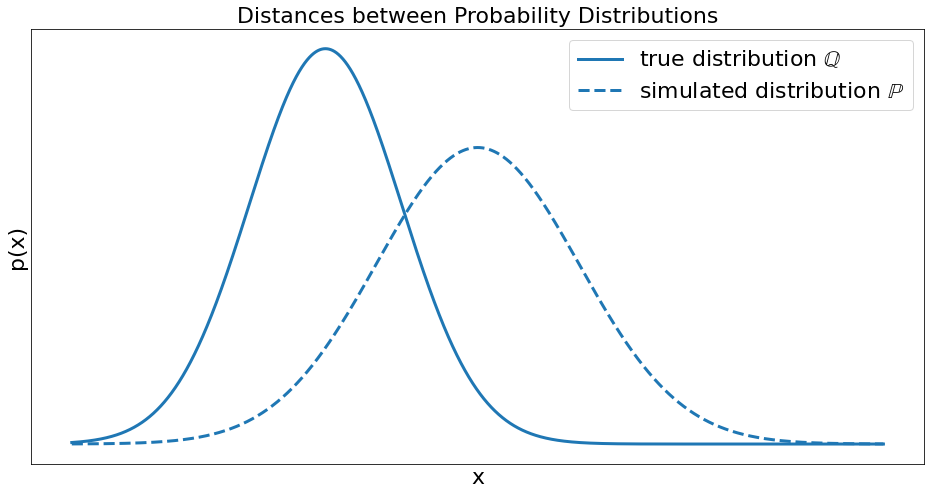

In [48]:
rng = np.arange(0, 16, 0.001)
plt.figure(figsize=(16,8))
cmap = plt.get_cmap("tab10")
pdf1 = stats.norm.pdf(rng,5,1.5)
pdf2 = stats.norm.pdf(rng,8,2)
plt.plot(pdf1,color=cmap(0), linewidth=3, label='true distribution '+r'$\mathbb{Q}$')
plt.plot(pdf2, color=cmap(0), linewidth=3, linestyle='--', label='simulated distribution '+r'$\mathbb{P}$')
plt.title('Distances between Probability Distributions')
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xticks([])
plt.yticks([])
plt.savefig('distances.pdf')
plt.show()